In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
file = pd.read_csv('D:\Earth.Org\Low Temperatures\Countries\Austria.csv')
name = 'Belarus'
file

,Year,Month,Temp. Anomaly,UC,Temperature
0,1750,1,-1.36,1.46,-5.375
1,1750,2,-0.04,2.08,-2.246
2,1750,3,2.24,2.57,3.640
3,1750,4,0.43,1.19,6.188
4,1750,5,-1.15,1.23,9.353
...,...,...,...,...,...
3247,2020,8,2.89,0.19,17.877
3248,2020,9,1.69,0.24,13.577
3249,2020,10,0.54,0.20,7.342
3250,2020,11,1.44,0.57,3.151


In [17]:
def create_table(name):
    print(name)
    file = pd.read_csv(f'D:\Earth.Org\Low Temperatures\Countries\{name}.csv')
    dates = file.sort_values('Year', ascending= False)
    dates = dates.iloc[0,0]
    #print(dates)
    file_old = file[(file['Year'] < 2000) & (file['Year'] >= 1900)]
    file_old = file_old.reset_index(drop = True)
    #print(file_old)
    month = 1
    store = [0]*12
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    while month <=12:
        temp = {}
        for x in file_old.values:
            if x[1] == month:
                if x[4] in temp:
                    temp[x[4]] += 1
                else:
                    temp[x[4]] = 1
        sum = 0
        tot = 0
        for x in temp:
            sum += float(x)*temp[x]
            tot += temp[x]
        store[month - 1] = sum/tot if tot >0 else sum
        month += 1
    country_base = pd.DataFrame(columns=['Month', 'AvgTemperature'])
    country_base['Month'] = months
    country_base['AvgTemperature'] = store
    country_base.style.set_caption("2000")
    #print(f'\t2000 {name}\n',country_base)
    plt.plot(country_base['Month'], country_base['AvgTemperature'])
    plt.title(f'{name}')
    plt.show()
    country_new = pd.DataFrame(columns=['Month'])
    country_new['Month'] = months
    for y in range(2000, dates+1,1):
        file_new = file[file['Year'] == y]
        #print(file_new)
        store = [0]*12
        month = 1
        while month <=12:
            temp = {}
            for x in file_new.values:
                if x[1] == month:
                    if x[4] in temp:
                        temp[x[4]] += 1
                    else:
                        temp[x[4]] = 1
            sum = 0
            tot = 0
            for x in temp:
                sum += float(x)*temp[x]
                tot += temp[x]
            store[month - 1] = sum/tot if tot > 0 else sum
            month += 1
        country_new[f'{y}'] = store
        #print(country_new)
    country = pd.merge(country_base,country_new, on='Month')
    country.to_csv(f'D:\Earth.Org\Low Temperatures\country_mod\{name}.csv')
    return country

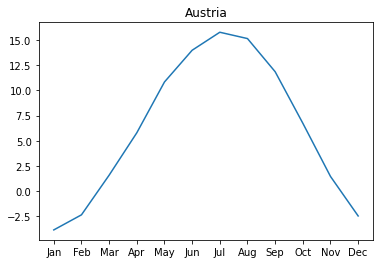

,Month,AvgTemperature,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Jan,-3.86856,-4.646,-2.523,-3.262,-3.808,-4.333,-2.869,-6.266,1.259,...,-2.627,-1.964,-2.455,0.079,-0.784,-2.022,-6.613,0.318,-3.394,-1.004
1,Feb,-2.36894,0.686,-0.168,2.075,-5.094,-1.032,-4.963,-3.197,1.949,...,-1.505,-5.912,-3.100,1.164,-1.749,1.775,0.793,-4.401,0.991,2.204
2,Mar,1.57346,2.768,4.257,3.851,3.195,1.053,0.694,-0.163,3.808,...,3.460,5.040,0.161,5.361,3.104,2.760,5.587,0.665,4.530,3.073
3,Apr,5.78675,8.914,5.297,6.148,5.796,7.051,6.968,7.045,9.790,...,9.426,7.085,7.696,8.528,6.969,7.538,6.215,11.210,7.902,8.694
4,May,10.83860,13.320,13.587,13.261,13.777,9.810,11.969,11.237,12.917,...,12.376,12.493,10.858,10.947,11.942,11.433,12.691,14.283,9.053,10.708
5,Jun,13.99266,16.215,13.332,16.854,18.810,14.084,15.225,15.325,16.497,...,15.460,16.341,14.723,15.381,15.884,15.738,17.570,16.296,19.144,15.055
6,Jul,15.78310,14.655,16.834,17.100,17.595,15.953,16.404,19.386,17.147,...,15.490,17.247,18.638,17.085,19.585,17.770,17.557,17.920,18.268,17.091
7,Aug,15.15423,17.426,17.632,16.407,19.633,16.678,14.444,13.697,15.975,...,17.593,17.855,17.380,14.948,19.030,16.351,18.072,18.709,18.001,17.877
8,Sep,11.85946,12.365,10.014,10.830,11.867,12.154,13.058,14.594,10.387,...,14.534,12.891,11.993,12.772,11.812,14.613,10.696,14.098,12.976,13.577
9,Oct,6.73970,9.195,10.422,6.853,4.338,8.821,8.237,9.644,6.454,...,6.906,7.395,8.557,9.547,7.163,6.594,8.652,9.426,9.220,7.342


In [4]:
country = create_table('Austria')
country 

In [5]:
country.to_csv('D:\Earth.Org\Low Temperatures\country_mod\Austria.csv')

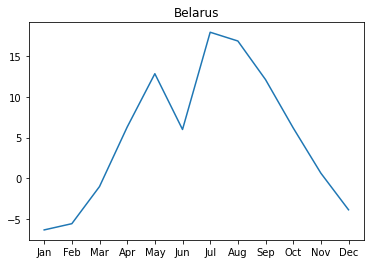

,Month,AvgTemperature,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Jan,-6.35701,-4.369,-2.218,-3.133,-5.679,-6.695,-1.382,-8.283,0.452,...,-3.801,-4.847,-7.101,-6.851,-1.198,-7.444,-5.719,-2.759,-5.266,0.952
1,Feb,-5.58997,-0.572,-4.013,1.591,-7.091,-3.961,-6.428,-8.338,-7.447,...,-8.087,-10.900,-1.857,-0.671,-1.093,1.118,-3.085,-6.147,0.328,1.641
2,Mar,-1.02450,1.259,0.226,3.375,-0.231,1.550,-3.622,-3.036,5.399,...,-0.388,1.238,-4.507,5.178,4.133,2.078,4.356,-2.551,3.442,3.811
3,Apr,6.29137,11.109,9.481,8.086,5.191,6.978,7.993,7.251,6.611,...,8.357,8.432,6.919,8.522,7.200,8.692,6.422,10.565,8.440,6.707
4,May,12.85064,13.266,12.689,14.994,15.723,11.287,13.398,12.637,15.069,...,13.800,14.869,16.646,14.683,12.704,14.738,12.609,16.725,14.226,10.996
5,Jun,5.99318,5.739,5.057,6.768,5.167,4.798,5.311,6.492,7.947,...,8.324,5.804,8.802,5.285,6.528,7.901,6.029,7.197,10.454,9.380
6,Jul,17.95104,17.200,22.280,21.603,20.092,18.039,19.313,20.020,18.076,...,20.392,20.629,18.520,20.472,18.183,19.805,17.635,19.949,17.342,18.360
7,Aug,16.87418,17.206,18.293,19.206,17.066,18.511,17.485,17.877,19.552,...,17.846,17.551,18.007,18.454,19.662,18.327,18.843,19.611,17.806,18.757
8,Sep,12.12898,10.514,12.375,12.180,12.209,12.708,14.244,14.025,12.820,...,13.558,13.452,11.554,12.778,14.382,13.699,13.750,15.249,12.957,14.914
9,Oct,6.18797,8.731,8.054,4.717,5.004,7.886,7.491,8.464,7.276,...,6.308,7.051,7.946,5.958,4.911,5.006,6.716,8.229,9.338,10.302


In [6]:
country = create_table('Belarus')
country.to_csv('D:\Earth.Org\Low Temperatures\country_mod\Belarus.csv')
country

In [14]:
data = pd.read_csv('D:\Earth.Org\Low Temperatures\coldest_regions.csv')
data = list(set(data.Country))
data

['Denmark',
 'Belarus',
 'Austria',
 'Liechtenstein',
 'Lithuania',
 'Estonia',
 'Kyrgyzstan',
 'Tajikistan',
 'China',
 'Kazakhstan',
 'Latvia',
 'Mongolia',
 'Russia',
 'Canada',
 'Finland',
 'Greenland',
 'North Korea',
 'Iceland',
 'Norway',
 'Sweden']

Denmark


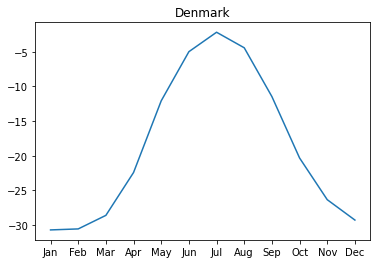

Belarus


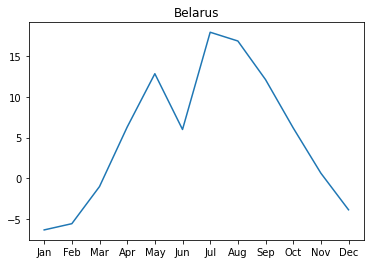

Austria


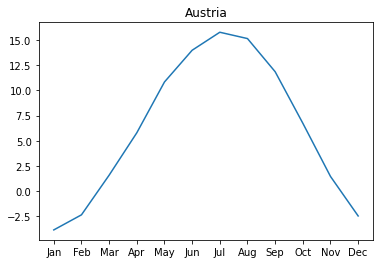

Liechtenstein


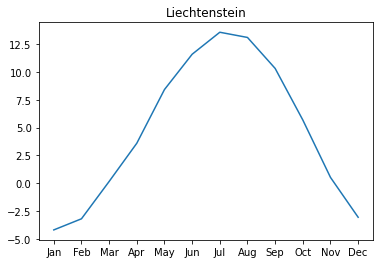

Lithuania


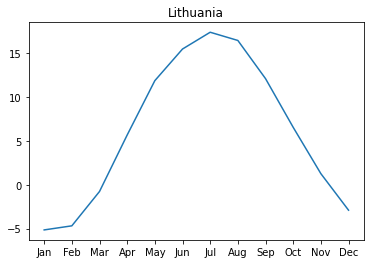

Estonia


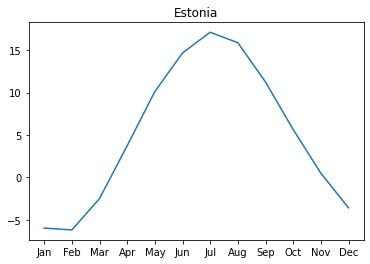

Kyrgyzstan


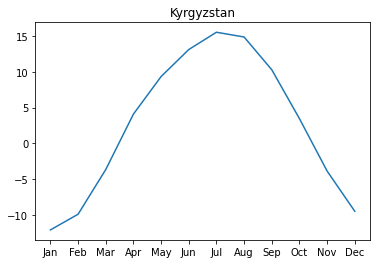

Tajikistan


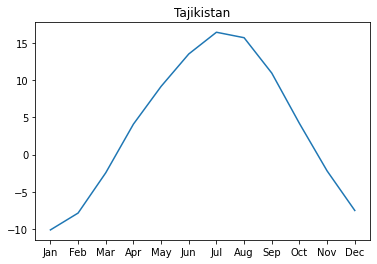

China


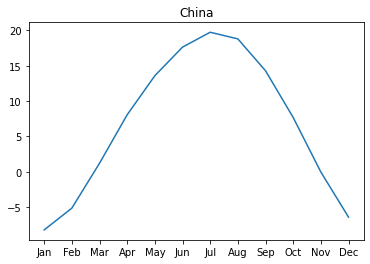

Kazakhstan


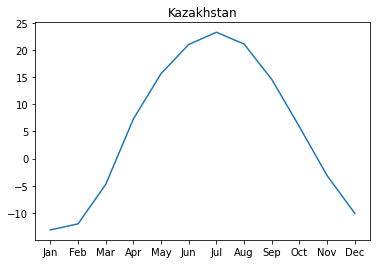

Latvia


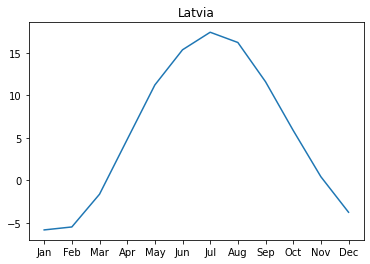

Mongolia


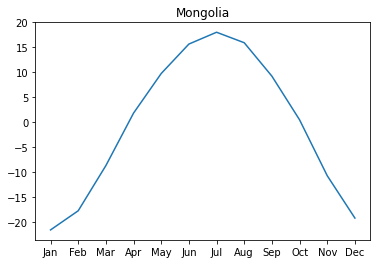

Russia


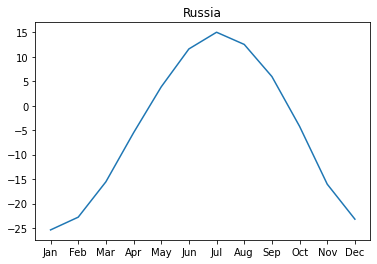

Canada


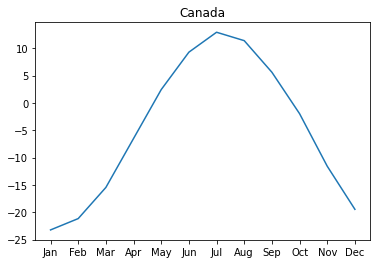

Finland


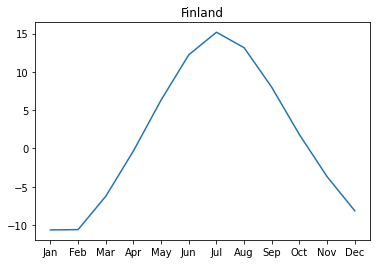

Greenland


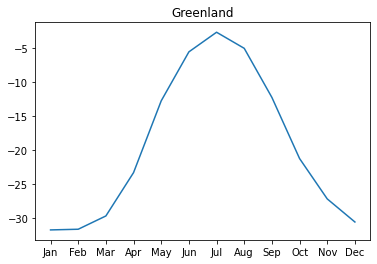

North Korea


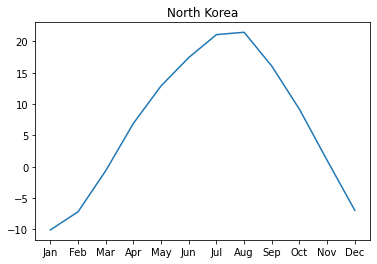

Iceland


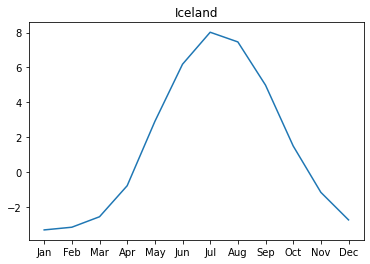

Norway


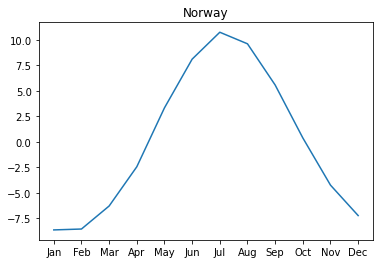

Sweden


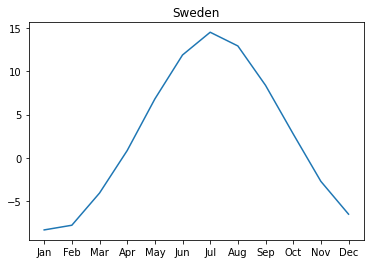

In [19]:
for c in data:
    create_table(c)